In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Normalize the data to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [5]:
y_train=to_categorical(y_train,10)
y_test= to_categorical(y_test,10)

In [7]:
datagen=ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [11]:
model = Sequential([
    # Input layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Fully connected layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Output layer
    Dense(10, activation='softmax')
])

C:\Users\ayush\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

In [23]:
from tensorflow.keras.utils import Sequence

class MyCustomDataGenerator(Sequence):
    def __init__(self, X, y, batch_size, **kwargs):
        super().__init__(**kwargs)
        self.X = X
        self.y = y
        self.batch_size = batch_size
        # Additional initializations

    def __len__(self):
        return int(np.ceil(len(self.X) / self.batch_size))

    def __getitem__(self, idx):
        batch_X = self.X[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_X, batch_y


In [25]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_test, y_test),
    epochs=100,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.5097 - loss: 1.3796 - val_accuracy: 0.5501 - val_loss: 1.2523
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5464 - loss: 1.2656 - val_accuracy: 0.6169 - val_loss: 1.0966
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.5783 - loss: 1.1888 - val_accuracy: 0.4821 - val_loss: 1.5370
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.5914 - loss: 1.1513 - val_accuracy: 0.4910 - val_loss: 1.6005
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.6086 - loss: 1.1089 - val_accuracy: 0.6491 - val_loss: 1.0052
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6275 - loss: 1.0616 - val_accuracy: 0.6035 - val_loss: 1.2009
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6368 - loss: 1.0355 - val_accuracy: 0.7037 - val_loss: 0.8786
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6435 - loss: 1

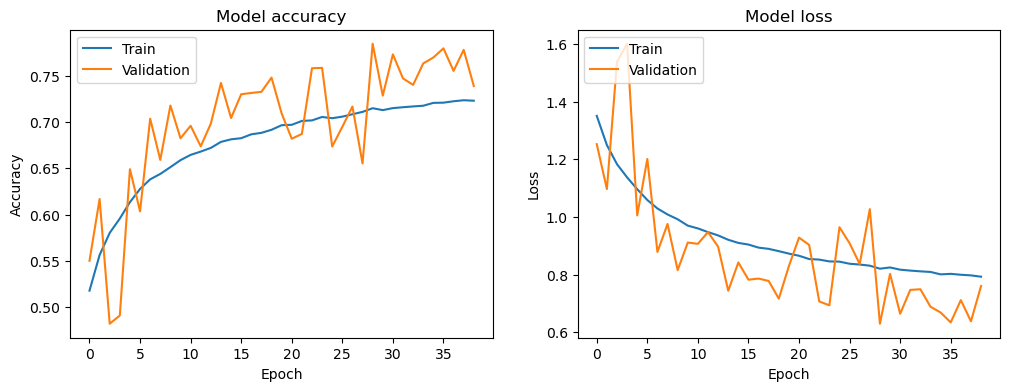

In [27]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [29]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7825 - loss: 0.6326
Test Loss: 0.6298
Test Accuracy: 0.7847


In [37]:
import numpy as np
# Predict on the test set
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Compare with true labels
true_classes = np.argmax(y_test, axis=1)
print(true_classes)
print(predicted_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[3 8 8 ... 5 1 7]
[3 8 8 ... 5 1 7]


In [43]:
# Save the model in TensorFlow SavedModel format
model.save('cifar10_model.keras')


In [45]:
from tensorflow.keras.models import load_model

# Load the entire model
loaded_model = load_model('cifar10_model.keras')


In [47]:
# Evaluate the loaded model
loss, accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Loaded Model Test Accuracy: {accuracy:.4f}")

# Make predictions with the loaded model
predictions = loaded_model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7825 - loss: 0.6326
Loaded Model Test Accuracy: 0.7847
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [49]:
from tensorflow.keras.layers import GlobalAveragePooling2D

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),
    Dropout(0.5),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


C:\Users\ayush\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)
datagen.fit(X_train)


In [53]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Freeze the base model layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile and train as usual
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [55]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)


In [57]:
pip install keras-tuner


Note: you may need to restart the kernel to use updated packages.


In [59]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int('conv_1_filter', min_value=32, max_value=128, step=16), 
                     (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(hp.Int('dense_1_units', min_value=128, max_value=512, step=16), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5)
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Trial 5 Complete [00h 01m 16s]
val_accuracy: 0.5981000065803528

Best val_accuracy So Far: 0.6604999899864197
Total elapsed time: 00h 15m 39s
